In [2]:
## import numpy as np
import SimpleITK as sitk
import pandas as pd

In [3]:
def load_nrrd(full_path_filename):

    data = sitk.ReadImage( full_path_filename )
    data = sitk.Cast( sitk.RescaleIntensity(data), sitk.sitkUInt8 )
    data = sitk.GetArrayFromImage(data)

    return(data)

In [4]:
# this function encodes a 2D file into run-length-encoding format (RLE)
# 	the inpuy is a 2D binary image (1 = positive), the output is a string of the RLE
def run_length_encoding(input_mask):
	
	dots = np.where(input_mask.T.flatten()==1)[0] #transpose and then flatten, index where image is positive
	
	run_lengths,prev = [],-2 #initiate empty list, prev
	
	for b in dots: #go through all positive indices, only add if there's non-consecutiv ones 
		if (b>prev+1): run_lengths.extend((b+1, 0)) #if b is greater then -1 (so it starts with 0) or the previous index, append(b+1, 0)

		run_lengths[-1] += 1 # add 1 to the last number of this iteration,so you know how many are 
		prev = b #let prev be 

	return(" ".join([str(i) for i in run_lengths]))


In [14]:
#decode mask 	
def run_length_decoding(run_lengths):
	h,w = use_image.shape
	mask = np.zeros(h*w)
	run_lengths_s = run_lengths[0].split()
    
	for i in range(len(run_lengths_s)):
		#even number is index and odd number is # of consecutive tags
		if i%2 == 0:
			mask[(int(run_lengths_s[i])-1):(int(run_lengths_s[i])+int(run_lengths_s[i+1])-1)] = 1
	mask = mask.reshape((h,w)).T
	return mask

In [5]:
train_file = '/Users/qinwenhuang/Documents/AtriaSeg_2018_training/train_labels.csv'

In [6]:
import numpy as np
import SimpleITK as sitk
import pandas as pd

In [7]:
image_name = []
rle = []
with open (train_file,'r') as f:
    for ind,line in enumerate(f):
        if ind > 0:
            line = line.split(',')
            image_name.append(line[0])
            rle.append((line[1:]))

        


In [8]:
image_name[20]

'06SR5RBREL16DQ6M8LWS_Slice_20'

In [9]:
test_rle = rle[20]

In [15]:
m = run_length_decoding(test_rle)

In [17]:
m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
test_rle

['152922 1 153495 7 154069 11 154644 13 155219 15 155794 17 156370 18 156945 19 157521 20 158096 21 158672 22 159247 24 159823 24 160398 25 160974 25 161549 26 162124 27 162699 28 163274 29 163850 28 164425 29 165001 29 165576 30 166152 29 166727 30 167303 29 167878 30 168454 29 169029 30 169605 29 170181 29 170757 28 171334 27 171912 24 172490 22 173068 19 173646 17 174225 13 174803 10 175381 7 175959 5\n']

In [36]:
rle = np.array(rle)
use_rle = rle[index]

In [107]:
a = run_length_encoding(m)

In [108]:
a

'152922 1 153495 7 154069 11 154644 13 155219 15 155794 17 156370 18 156945 19 157521 20 158096 21 158672 22 159247 24 159823 24 160398 25 160974 25 161549 26 162124 27 162699 28 163274 29 163850 28 164425 29 165001 29 165576 30 166152 29 166727 30 167303 29 167878 30 168454 29 169029 30 169605 29 170181 29 170757 28 171334 27 171912 24 172490 22 173068 19 173646 17 174225 13 174803 10 175381 7 175959 5'

In [117]:
test_rle == a

False

In [10]:
image = load_nrrd("/Users/qinwenhuang/Documents/AtriaSeg_2018_training/Training Set/06SR5RBREL16DQ6M8LWS/lgemri.nrrd")


In [11]:
image.shape

(88, 576, 576)

In [12]:
use_image = image[19,:,:]

In [13]:
use_image

array([[2, 1, 0, ..., 0, 0, 1],
       [2, 2, 2, ..., 2, 1, 1],
       [0, 2, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 2, 1],
       [0, 1, 2, ..., 2, 0, 0]], dtype=uint8)

In [115]:
m = m *255

In [112]:
new_image = use_image*0.1+m*0.9

In [113]:
new_image.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/qinwenhuang/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


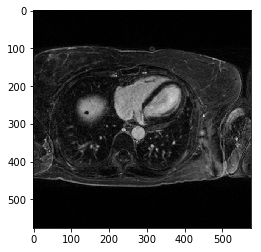

In [111]:
plt.imshow(use_image,cmap=cm.gray)

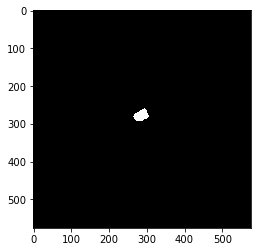

In [116]:
plt.imshow(m,cmap=cm.gray)

ModuleNotFoundError: No module named 'cv2'